In [116]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine


In [117]:
host = 'localhost'
database = 'sisagua'
user = 'postgres'
password = '1234'
port = '5433'
    

In [118]:
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')


In [119]:
query = """
SELECT *
FROM dados_sisagua_transformados
WHERE ano = 2024;
"""

In [120]:
df_sisagua = pd.read_sql(query, engine)

In [121]:
df_sisagua.columns

Index(['municipio', 'ano', 'tipo_da_forma_de_abastecimento', 'mes',
       'parametro', 'data_da_coleta', 'resultado', '__arquivo_origem',
       'resultado_num', 'conformidade', 'tipo_analise'],
      dtype='object')

In [122]:
df_sisagua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232563 entries, 0 to 232562
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   municipio                       232563 non-null  object 
 1   ano                             232563 non-null  int64  
 2   tipo_da_forma_de_abastecimento  232563 non-null  object 
 3   mes                             232563 non-null  object 
 4   parametro                       232563 non-null  object 
 5   data_da_coleta                  232563 non-null  object 
 6   resultado                       232563 non-null  object 
 7   __arquivo_origem                232563 non-null  object 
 8   resultado_num                   143234 non-null  float64
 9   conformidade                    232563 non-null  object 
 10  tipo_analise                    232563 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 19.5+ MB


In [123]:
df_sisagua.shape

(232563, 11)

In [124]:
df_sisagua.head()

,municipio,ano,tipo_da_forma_de_abastecimento,mes,parametro,data_da_coleta,resultado,__arquivo_origem,resultado_num,conformidade,tipo_analise
0,IGUATU,2024,SAA,2,pH,2024-02-07,7,dados_2024_2025_05_02.csv,7.0,CONFORME,Físico-Química
1,PENTECOSTE,2024,SAA,5,pH,2024-05-06,7,dados_2024_2025_05_02.csv,7.0,CONFORME,Físico-Química
2,GRANJA,2024,SAA,10,pH,2024-10-15,7,dados_2024_2025_05_02.csv,7.0,CONFORME,Físico-Química
3,ACOPIARA,2024,SAA,1,pH,2024-01-29,"8,2",dados_2024_2025_05_02.csv,8.2,CONFORME,Físico-Química
4,PINDORETAMA,2024,SAA,11,pH,2024-11-14,7,dados_2024_2025_05_02.csv,7.0,CONFORME,Físico-Química


In [125]:
verifica = df_sisagua['municipio'].unique()
verifica

array(['IGUATU', 'PENTECOSTE', 'GRANJA', 'ACOPIARA', 'PINDORETAMA', 'ICO',
       'NOVA RUSSAS', 'SOLONOPOLE', 'MOMBACA', 'ALTO SANTO', 'JAGUARIBE',
       'IPU', 'RUSSAS', 'HORIZONTE', 'CEDRO', 'ERERE', 'CAMPOS SALES',
       'SALITRE', 'BATURITE', 'PORANGA', 'JIJOCA DE JERICOACOARA',
       'ARACOIABA', 'SAO BENEDITO', 'APUIARES', 'TIANGUA', 'FORTIM',
       'BELA CRUZ', 'IPAUMIRIM', 'ITAREMA', 'PACAJUS', 'MARANGUAPE',
       'MARACANAU', 'PEDRA BRANCA', 'MILAGRES', 'UMARI', 'ARNEIROZ',
       'UBAJARA', 'PIRES FERREIRA', 'SANTA QUITERIA', 'SANTANA DO ACARAU',
       'ABAIARA', 'ITAPIUNA', 'SAO LUIS DO CURU', 'ITAITINGA', 'PALMACIA',
       'CANINDE', 'QUIXERE', 'ARACATI', 'AQUIRAZ', 'GENERAL SAMPAIO',
       'CARIUS', 'CRUZ', 'ALCANTARAS', 'FORTALEZA', 'SOBRAL',
       'SENADOR SA', 'LIMOEIRO DO NORTE', 'CRATO', 'PACATUBA',
       'RERIUTABA', 'EUSEBIO', 'MUCAMBO', 'BARROQUINHA', 'VARJOTA',
       'BARREIRA', 'CARIRE', 'REDENCAO', 'CATUNDA', 'JUAZEIRO DO NORTE',
       'BOA VIAGEM',

In [126]:
quantidade_municipio = len(verifica)
quantidade_municipio

184

In [127]:
df_sisagua['parametro'].value_counts()

parametro
Cloro residual livre (mg/L)        46829
Turbidez (uT)                      44962
Escherichia coli                   44748
Coliformes totais                  44581
Cor Aparente (uH)                  30698
Fluoreto (mg/L)                    13140
pH                                  7590
Cloro residual combinado (mg/L)       15
Name: count, dtype: int64

In [128]:
df_sisagua["tipo_da_forma_de_abastecimento"].value_counts()

tipo_da_forma_de_abastecimento
SAA    232563
Name: count, dtype: int64

In [129]:
agua_boa = df_sisagua['conformidade'] 
parametro = df_sisagua['resultado_num']

In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [131]:
## Supondo que df_sisagua é seu DataFrame carregado do PostgreSQL
## Vamos criar uma cópia para trabalhar em memória
df_ml = df_sisagua.copy()

In [132]:
# 1. Transformar a coluna 'conformidade' em booleano
df_ml['conforme_bool'] = df_ml['conformidade'].apply(lambda x: 1 if x == 'CONFORME' else 0)

In [133]:
# 2. Verificar a distribuição dos valores
print("\nDistribuição dos valores booleanos:")
print(df_ml['conforme_bool'].value_counts())


Distribuição dos valores booleanos:
conforme_bool
1    197438
0     35125
Name: count, dtype: int64


In [134]:
# 3. Criar uma coluna comparativa entre resultado_num e parâmetros de referência
#    (Aqui você precisa definir seus critérios específicos)
def verificar_conformidade_numerica(row):
    parametro = str(row['parametro']).strip().upper()
    valor = row['resultado_num']
    
    try:
        if parametro == 'TURBIDEZ (UT)':
            return 1 if valor < 5 else 0
        elif parametro == 'CLORO RESIDUAL LIVRE (MG/L)':
            return 1 if 0.2 <= valor <= 5.0 else 0
        elif parametro == 'PH':
            return 1 if 6 <= valor <= 9.5 else 0
        elif parametro == 'COR APARENTE (UH)':
            return 1 if valor < 15 else 0
        elif parametro == 'FLUORETO (MG/L)':
            return 1 if valor <= 1.5 else 0
        else:
            return np.nan
    except:
        return np.nan

df_ml['conforme_numerico'] = df_ml.apply(verificar_conformidade_numerica, axis=1)

In [135]:
# 4. Comparar as duas abordagens (classificação textual vs numérica)
print("\nComparativo entre as classificações:")
print(pd.crosstab(df_ml['conforme_bool'], df_ml['conforme_numerico']))


Comparativo entre as classificações:
conforme_numerico    0.0     1.0
conforme_bool                   
0                  18901       0
1                      0  124318


In [136]:
# 5. Preparação para Machine Learning
# Codificar variáveis categóricas
le = LabelEncoder()
df_ml['parametro_encoded'] = le.fit_transform(df_ml['parametro'])

In [137]:
# Selecionar features e target
features = df_ml[['resultado_num', 'parametro_encoded']]
target = df_ml['conforme_bool']

print("\nDados preparados para ML:")
print("Features:", features.shape)
print("Target:", target.shape)


Dados preparados para ML:
Features: (232563, 2)
Target: (232563,)


In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [139]:
# 1. Verificar e tratar valores nulos
print("Valores nulos antes do tratamento:")
print(df_ml.isnull().sum())


Valores nulos antes do tratamento:
municipio                             0
ano                                   0
tipo_da_forma_de_abastecimento        0
mes                                   0
parametro                             0
data_da_coleta                        0
resultado                             0
__arquivo_origem                      0
resultado_num                     89329
conformidade                          0
tipo_analise                          0
conforme_bool                         0
conforme_numerico                 89344
parametro_encoded                     0
dtype: int64


In [140]:
# Preencher valores nulos na coluna numérica
imputer = SimpleImputer(strategy='mean')
df_ml['resultado_num'] = imputer.fit_transform(df_ml[['resultado_num']])

In [141]:
# Remover linhas com outros valores nulos (se necessário)
df_ml.dropna(subset=['parametro', 'conforme_bool'], inplace=True)

In [142]:
# 2. Codificar variáveis categóricas
le = LabelEncoder()
df_ml['parametro_encoded'] = le.fit_transform(df_ml['parametro'])

In [143]:
# 3. Selecionar features e target
features = df_ml[['resultado_num', 'parametro_encoded']]
target = df_ml['conforme_bool']

In [144]:
# 4. Verificar se há dados suficientes
if len(features) == 0:
    raise ValueError("Não há dados válidos para treinamento após a limpeza.")

In [145]:
# 5. Dividir os dados (com verificação adicional)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        features.values,  # Convertendo para array numpy
        target.values,    # Convertendo para array numpy
        test_size=0.3,
        random_state=42,
        stratify=target  # Manter proporção das classes
    )
    print("\nDivisão dos dados realizada com sucesso!")
    print(f"Treino: {X_train.shape[0]} amostras")
    print(f"Teste: {X_test.shape[0]} amostras")
    
except Exception as e:
    print(f"\nErro ao dividir os dados: {e}")
    print("Verifique se:")
    print("- Seus dados não contêm valores infinitos")
    print("- Todas as colunas numéricas estão com tipos corretos")
    print("- Não há valores nulos restantes")
    raise


Divisão dos dados realizada com sucesso!
Treino: 162794 amostras
Teste: 69769 amostras


In [146]:
# 6. Treinar modelo (apenas se a divisão foi bem sucedida)
if 'X_train' in locals():
    model = LogisticRegression(max_iter=1000)  # Aumentando iterações para convergência
    model.fit(X_train, y_train)

In [147]:
 # Avaliar
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
    
print("\nResultados do modelo:")
print(f"Acurácia no treino: {train_score:.2%}")
print(f"Acurácia no teste: {test_score:.2%}")


Resultados do modelo:
Acurácia no treino: 87.73%
Acurácia no teste: 87.76%


In [148]:
# Verificar tipos de dados
print("\nTipos de dados:")
print(features.dtypes)


Tipos de dados:
resultado_num        float64
parametro_encoded      int64
dtype: object


In [149]:
# Verificar valores infinitos
print("\nValores infinitos nas features:")
print(np.isinf(features.values).sum())


Valores infinitos nas features:
0


In [150]:
# Verificar balanceamento das classes
print("\nDistribuição das classes:")
print(target.value_counts(normalize=True))


Distribuição das classes:
conforme_bool
1    0.848966
0    0.151034
Name: proportion, dtype: float64


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# Configuração mais simples e robusta
sns.set_theme(style="whitegrid")  # Ativa o estilo do Seaborn
plt.rcParams['figure.figsize'] = (12, 6)  # Define o tamanho padrão
plt.rcParams['font.size'] = 12  # Tamanho da fonte

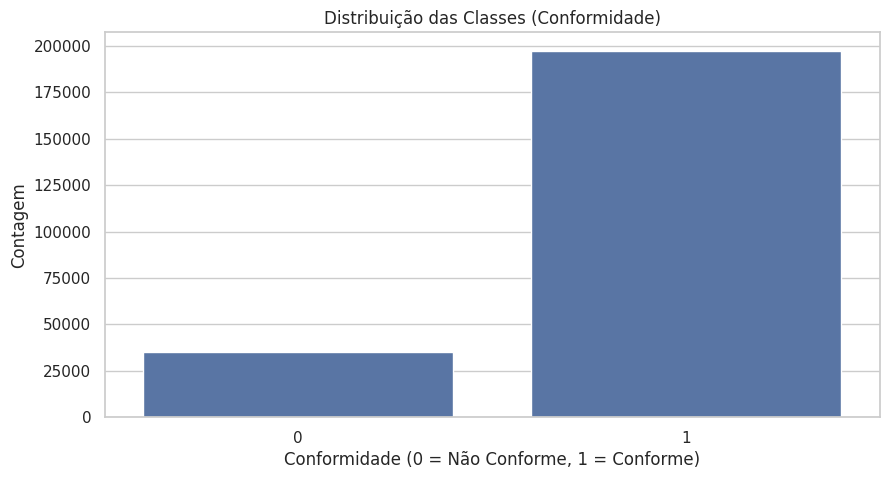

In [153]:
# 1. Gráfico de Distribuição das Classes
plt.figure(figsize=(10, 5))
sns.countplot(x='conforme_bool', data=df_ml)
plt.title('Distribuição das Classes (Conformidade)')
plt.xlabel('Conformidade (0 = Não Conforme, 1 = Conforme)')
plt.ylabel('Contagem')
plt.show()

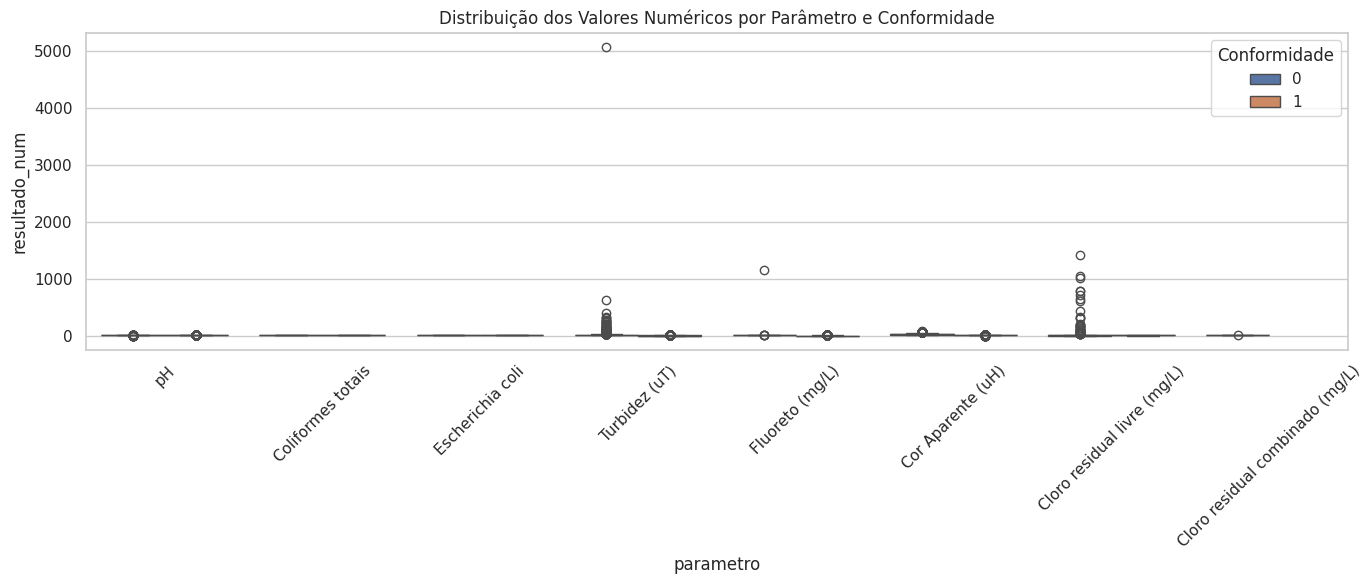

In [154]:
# 2. Boxplot por Parâmetro
plt.figure(figsize=(14, 6))
sns.boxplot(x='parametro', y='resultado_num', hue='conforme_bool', data=df_ml)
plt.title('Distribuição dos Valores Numéricos por Parâmetro e Conformidade')
plt.xticks(rotation=45)
plt.legend(title='Conformidade', loc='upper right')
plt.tight_layout()
plt.show()

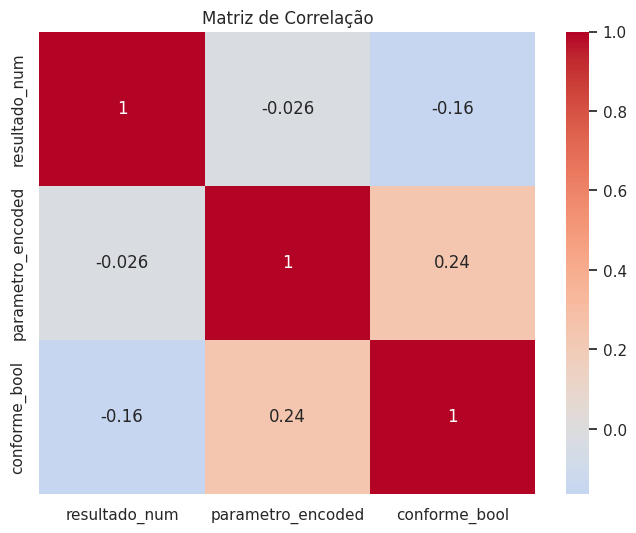

In [155]:
# 4. Matriz de Correlação
corr_matrix = df_ml[['resultado_num', 'parametro_encoded', 'conforme_bool']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

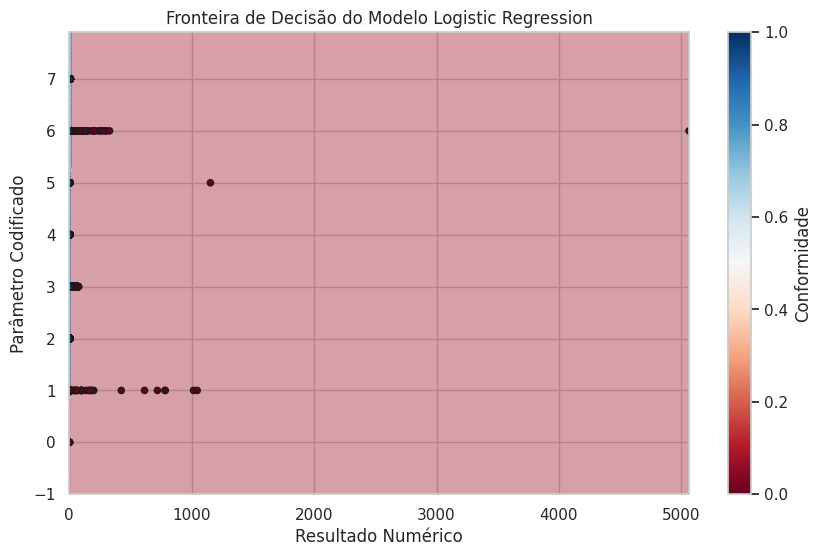

In [156]:
# 5. Gráfico de Decisão (após treinar o modelo)
if 'X_train' in locals():
    # Criar grid para visualização
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
      # Prever para todo o grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

     # Plotar
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    plt.scatter(
        X_train[:, 0], X_train[:, 1], 
        c=y_train, 
        s=20, 
        edgecolor='k',
        cmap='RdBu'
    )
    plt.title('Fronteira de Decisão do Modelo Logistic Regression')
    plt.xlabel('Resultado Numérico')
    plt.ylabel('Parâmetro Codificado')
    plt.colorbar(label='Conformidade')
    plt.show()

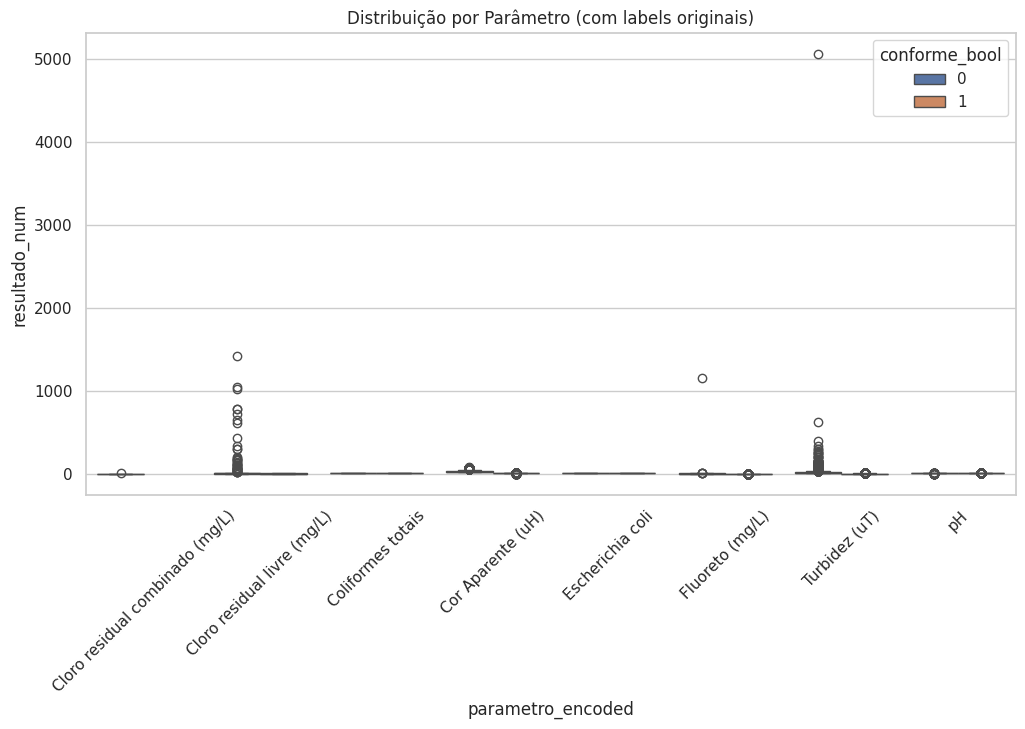

In [157]:
 # Criar mapeamento dos parâmetros
parametro_map = {i: name for i, name in enumerate(le.classes_)}

# Aplicar nos eixos dos gráficos
plt.figure(figsize=(12, 6))
plot = sns.boxplot(x='parametro_encoded', y='resultado_num', hue='conforme_bool', data=df_ml)
plt.xticks(ticks=range(len(parametro_map)), labels=parametro_map.values(), rotation=45)
plt.title('Distribuição por Parâmetro (com labels originais)')
plt.show()

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [159]:
# Configuração dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [160]:
## 1. Pré-processamento dos dados
# Supondo que df_ml já existe com as colunas necessárias
X = df_ml[['resultado_num']]  # Variável preditora
y = df_ml['conforme_bool']    # Variável target

In [161]:
# Padronização dos dados (importante para regressão logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [162]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [163]:
## 2. Modelagem
model = LogisticRegression()
model.fit(X_train, y_train)

# Coeficientes do modelo
print("\nCoeficientes do modelo:")
print(f"Intercept (θ₀): {model.intercept_[0]:.4f}")
print(f"Coeficiente (θ₁): {model.coef_[0][0]:.4f}")


Coeficientes do modelo:
Intercept (θ₀): 1.8019
Coeficiente (θ₁): -3.6021


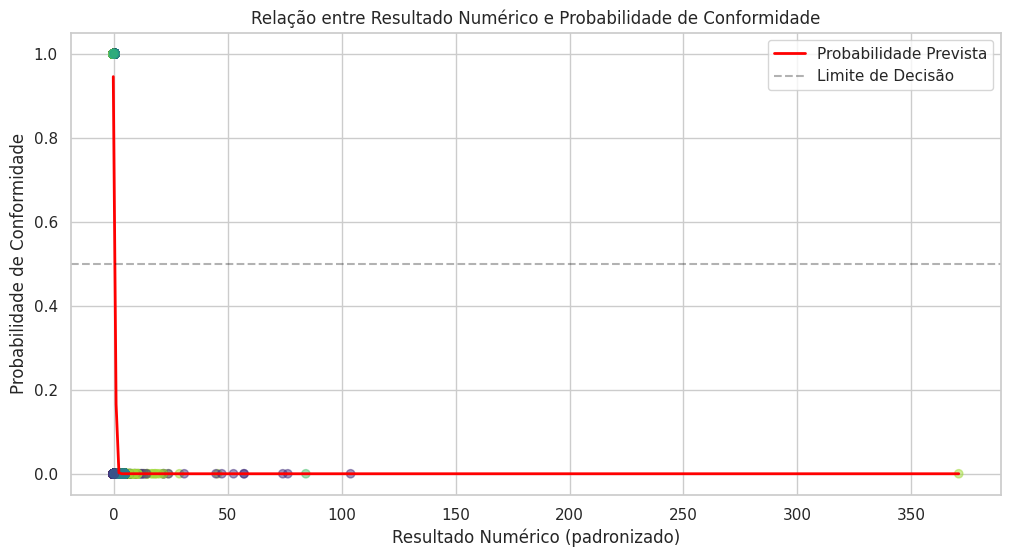

In [171]:
# Gráfico 1: Curva de Decisão
plt.figure(figsize=(12, 6))
x_values = np.linspace(X_scaled.min(), X_scaled.max(), 300)
y_probs = model.predict_proba(x_values.reshape(-1, 1))[:, 1]
plt.scatter(X_scaled, y, alpha=0.5, c=df_ml['parametro_encoded'], cmap='viridis')
#plt.scatter(X_scaled, y, alpha=0.5, label='Dados Observados')
plt.plot(x_values, y_probs, color='red', linewidth=2, label='Probabilidade Prevista')
plt.title('Relação entre Resultado Numérico e Probabilidade de Conformidade')
plt.xlabel('Resultado Numérico (padronizado)')
plt.ylabel('Probabilidade de Conformidade')
plt.axhline(0.5, color='black', linestyle='--', alpha=0.3, label='Limite de Decisão')
plt.legend()
plt.show()

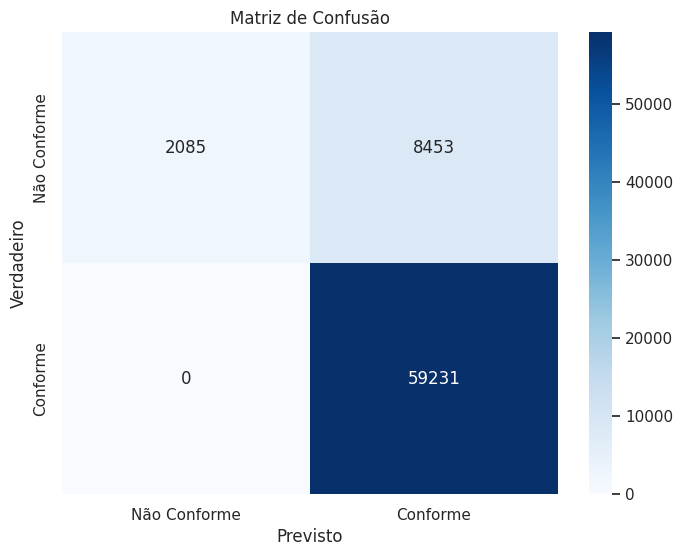

In [172]:
# Gráfico 2: Matriz de Confusão
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Conforme', 'Conforme'],
            yticklabels=['Não Conforme', 'Conforme'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

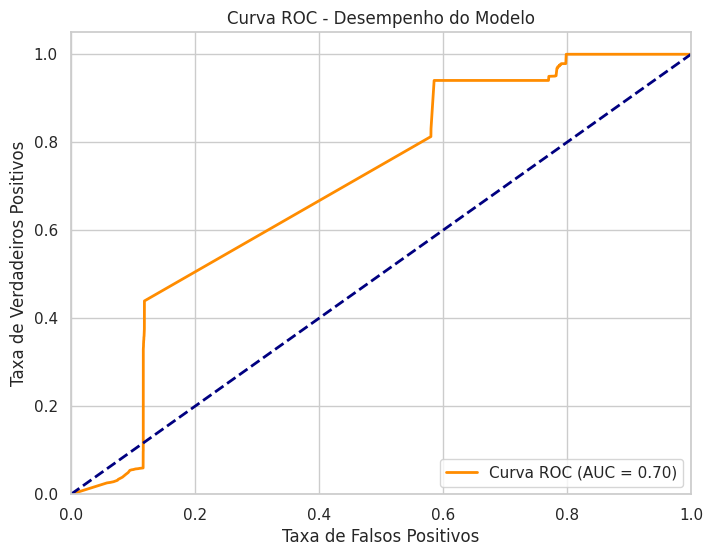

In [166]:
# Gráfico 3: Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Desempenho do Modelo')
plt.legend(loc="lower right")
plt.show()

In [167]:
## 4. Métricas de Desempenho
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33     10538
           1       0.88      1.00      0.93     59231

    accuracy                           0.88     69769
   macro avg       0.94      0.60      0.63     69769
weighted avg       0.89      0.88      0.84     69769



In [168]:
# Interpretação dos coeficientes
odds_ratio = np.exp(model.coef_[0][0])
print(f"\nRazão de Chances (Odds Ratio): {odds_ratio:.4f}")
print("Interpretação: Para cada aumento de 1 unidade no resultado padronizado,")
print(f"as chances de ser conforme aumentam em {(odds_ratio - 1)*100:.2f}%")


Razão de Chances (Odds Ratio): 0.0273
Interpretação: Para cada aumento de 1 unidade no resultado padronizado,
as chances de ser conforme aumentam em -97.27%


/tmp/ipykernel_5979/2762011980.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conformidade_por_faixa = df_ml.groupby('faixa_resultado')['conforme_bool'].mean().reset_index()
/tmp/ipykernel_5979/2762011980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='faixa_resultado', y='conforme_bool', data=conformidade_por_faixa, palette='viridis')


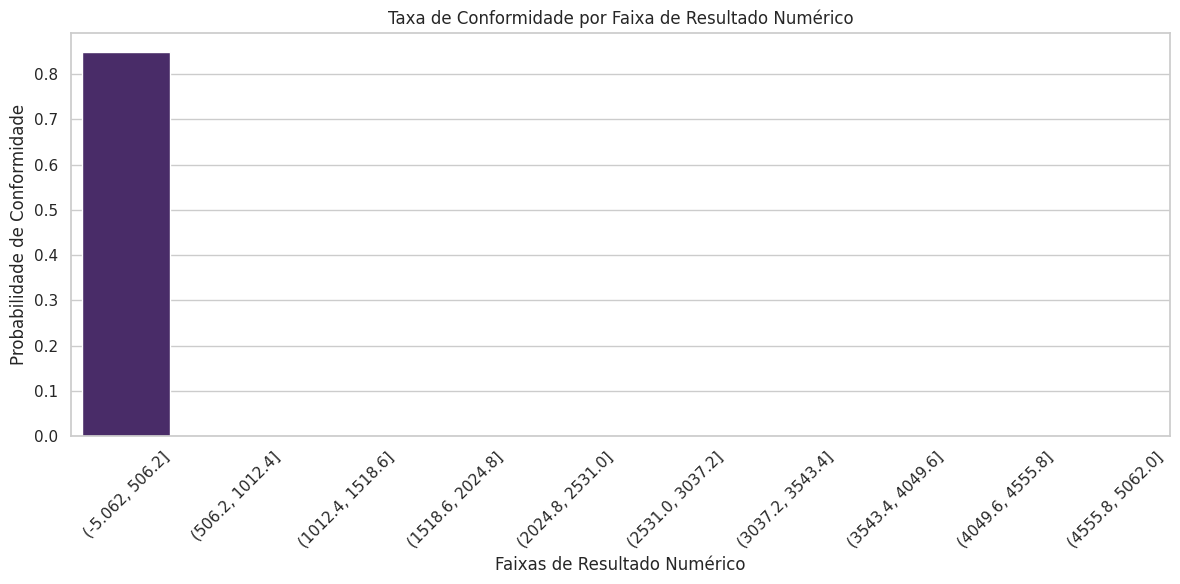

In [169]:
## 5. Análise por Faixas de Valores
df_ml['faixa_resultado'] = pd.cut(df_ml['resultado_num'], bins=10)
conformidade_por_faixa = df_ml.groupby('faixa_resultado')['conforme_bool'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='faixa_resultado', y='conforme_bool', data=conformidade_por_faixa, palette='viridis')
plt.title('Taxa de Conformidade por Faixa de Resultado Numérico')
plt.xlabel('Faixas de Resultado Numérico')
plt.ylabel('Probabilidade de Conformidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()